In [1]:
#Universidad Galileo
#Maestría de Ciencia de Datos
#Statistical Learning 1
#Jose Godoy
#Carnet 22000570
#26 de mayo 2022

#Tarea 1

In [2]:
#Importando librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#Cargando datos del proyecto
data = np.load('proyecto_data/proyecto_training_data.npy')
columnas_nombre = np.array(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
columnas_descripcion = np.array(['Precio', 'Feedback', 'Metros cuadrados del primer nivel', 'Habitaciones', 'Año de construcción', 'Distancia lineal desde la calle'])

#Forma
shape = data.shape
print("Shape: ", shape)

#Previsualización general de los datos
print("Previsualización: ")
print(pd.DataFrame(data, columns=columnas_nombre).head().to_string(index=False))


Shape:  (1460, 6)
Previsualización: 
 SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
  208500.0          7.0     856.0           8.0     2003.0         65.0
  181500.0          6.0    1262.0           6.0     1976.0         80.0
  223500.0          7.0     920.0           6.0     2001.0         68.0
  140000.0          7.0     961.0           7.0     1915.0         60.0
  250000.0          8.0    1145.0           9.0     2000.0         84.0


In [4]:
#●	Usando sclicing con NumPy separar los datos en 2 datasets:

training = int(shape[0]*0.8)

#Datos de entrenamiento
data_training = data[0:training,:]
#Datos de validación y pruebas
data_validation = data[training:shape[0],:]

print("Shape training data: ", data_training.shape)
print("Shape test data: ", data_validation.shape)

Shape training data:  (1168, 6)
Shape test data:  (292, 6)


In [5]:
#Análisis exploratorio de datos

def my_reshape(my_array):
    return my_array.reshape(my_array.shape[0], 1)

#?	Para cada variable en el dataset calcular((usando numpy o pandas):

#Media
media = my_reshape(np.nanmean(data, axis=0))
print("\n")
print(pd.DataFrame(media, index=columnas_nombre, columns=["Media"]).to_string())

#Máximo
maximo = my_reshape(np.nanmax(data, axis=0))
print("\n")
print(pd.DataFrame(maximo, index=columnas_nombre, columns=["Máximo"]).to_string())

#Mínimo
minimo = my_reshape(np.nanmin(data, axis=0))
print("\n")
print(pd.DataFrame(minimo, index=columnas_nombre, columns=["Mínimo"]).to_string())

#Range peak to peak
rango_ptp = my_reshape(np.ptp(data, axis=0))
print("\n")
print(pd.DataFrame(rango_ptp, index=columnas_nombre, columns=["Rango peak to peak"]).to_string())

#En el resultado se observa que la columna 6 tiene valores null
#Dado que np.ptp no tiene np.nanptp, se procede a eliminar los valores nan de la columna 6
col_6_isnan = np.isnan(data[:,5])
#Se reemplaza el 6to valor en rango_ptp con la nueva columna
rango_ptp[5, 0] = np.ptp(data[col_6_isnan==False, 5])
print("\n")
print(pd.DataFrame(rango_ptp, index=columnas_nombre, columns=["Rango peak to peak (sin nan)"]).to_string())

#Desviación estandar
desviacion_estandar = my_reshape(np.nanstd(data, axis=0))
print("\n")
print(pd.DataFrame(desviacion_estandar, index=columnas_nombre, columns=["Desviación estandar"]).to_string())




                      Media
SalePrice     180921.195890
OverallQual        6.099315
1stFlrSF        1162.626712
TotRmsAbvGrd       6.517808
YearBuilt       1971.267808
LotFrontage       70.049958


                Máximo
SalePrice     755000.0
OverallQual       10.0
1stFlrSF        4692.0
TotRmsAbvGrd      14.0
YearBuilt       2010.0
LotFrontage      313.0


               Mínimo
SalePrice     34900.0
OverallQual       1.0
1stFlrSF        334.0
TotRmsAbvGrd      2.0
YearBuilt      1872.0
LotFrontage      21.0


              Rango peak to peak
SalePrice               720100.0
OverallQual                  9.0
1stFlrSF                  4358.0
TotRmsAbvGrd                12.0
YearBuilt                  138.0
LotFrontage                  NaN


              Rango peak to peak (sin nan)
SalePrice                         720100.0
OverallQual                            9.0
1stFlrSF                            4358.0
TotRmsAbvGrd                          12.0
YearBuilt                        

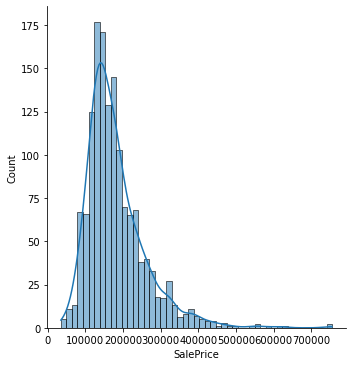

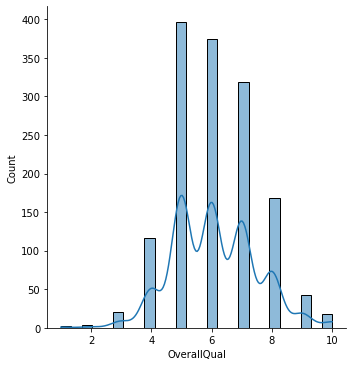

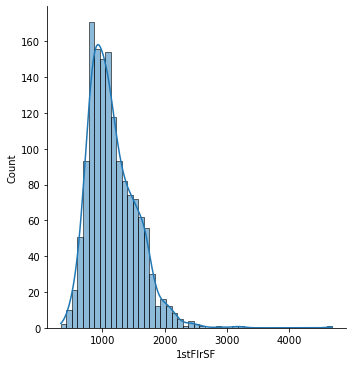

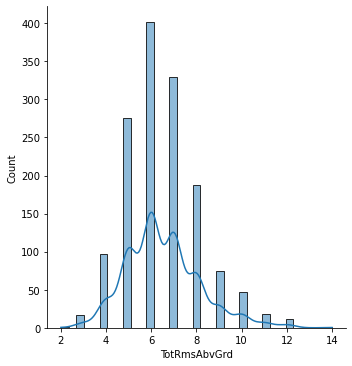

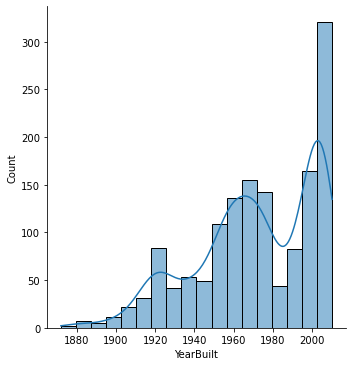

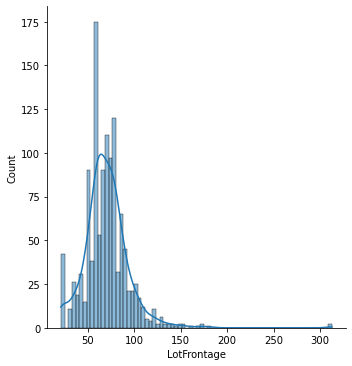

In [6]:
#○	Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)  para graficar  un histograma de la variable

#Histograma de la variable

c0 = sns.displot(data=data[:,0], kde=True)
c0.set_axis_labels(columnas_nombre[0])

c1 = sns.displot(data=data[:,1], kde=True)
c1.set_axis_labels(columnas_nombre[1])

c2 = sns.displot(data=data[:,2], kde=True)
c2.set_axis_labels(columnas_nombre[2])

c3 = sns.displot(data=data[:,3], kde=True)
c3.set_axis_labels(columnas_nombre[3])

c4 = sns.displot(data=data[:,4], kde=True)
c4.set_axis_labels(columnas_nombre[4])

c5 = sns.displot(data=data[:,5], kde=True)
c5.set_axis_labels(columnas_nombre[5])



In [7]:
#○	Calcular el coeficiente de correlación entre x y y

#Covarianza
cov = np.cov(data, rowvar=False)[0,0:]

#Covarianza para la columna 6
x = data[col_6_isnan==False, 5]
ynan = data[col_6_isnan==False, 0]
cov[-1] = np.cov(x, ynan)[0,1]
cov = cov.reshape(1, 6)

print("Covarianza")
print(cov)

#Coheficiente de correlación
cc = cov / (desviacion_estandar[0][0]*desviacion_estandar).reshape(1,6)
#[0,1:]
print("\nCoheficiente de correlación:\n")
print(pd.DataFrame(cc, columns=columnas_nombre).iloc[:,1:6].to_string(index=False))

#Utilizando la función de numpy corrcoef

corrcoef = np.corrcoef(data, rowvar=False)[0,0:]

#Coheficiente de correlación para la columna 6
x = data[col_6_isnan==False, 5]
ynan = data[col_6_isnan==False, 0]
corrcoef[-1] = np.corrcoef(x, ynan)[0,1]
corrcoef = corrcoef.reshape(1, 6)

print("\nUtilizando la función de numpy corrcoef:\n")
print(pd.DataFrame(corrcoef, columns=columnas_nombre).iloc[:,1:6].to_string(index=False))

Covarianza
[[6.31111126e+09 8.69041258e+04 1.86066279e+07 6.89171685e+04
  1.25463688e+06 7.12426166e+05]]

Coheficiente de correlación:

 OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
    0.791524  0.606267      0.534089   0.523256     0.369558

Utilizando la función de numpy corrcoef:

 OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
    0.790982  0.605852      0.533723   0.522897     0.351799


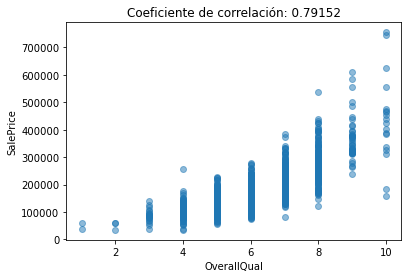

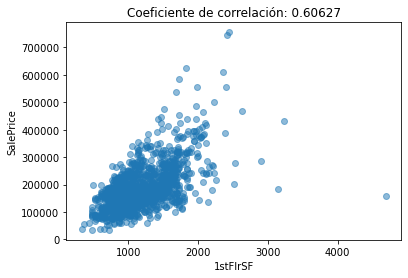

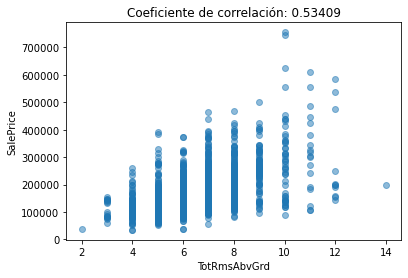

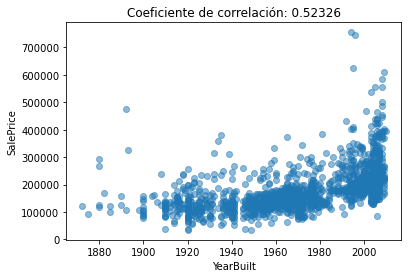

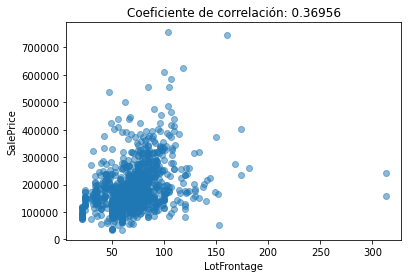

Variables x que representan un mayor valor predictivo
OverallQual  Coeficiente de correlación = 0.7909816005838052
1stFlrSF  Coeficiente de correlación = 0.6058521846919145


In [8]:
#○	graficar x vs y(scatterplot) usando matplotlib
#○	Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica. 


# Grafica x vs y (scatterplot) usando matplotlib
for i in range(1,6):
    plt.scatter(data[:,i], data[:,0], alpha=0.5)
    plt.xlabel(columnas_nombre[i])
    plt.ylabel(columnas_nombre[0])
    plt.title("Coeficiente de correlación: "+str(np.around(cc[0,i], 5)))
    plt.show()

#●	Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo(la 2 que presentan mayor correlación).
    
# Variables x que representan un mayor predictivo
columna_1st_predictivo = 1
columna_2nd_predictivo = 2

print("Variables x que representan un mayor valor predictivo")
print(columnas_nombre[columna_1st_predictivo], " Coeficiente de correlación =", corrcoef[0,columna_1st_predictivo])
print(columnas_nombre[columna_2nd_predictivo], " Coeficiente de correlación =", corrcoef[0,columna_2nd_predictivo])


In [9]:
#●	Crear una función para entrenar un modelo de regresión lineal de una variable y = mx +b.
def regresion_lineal(x, y, epochs, imprimir_error_cada, lr, mb):
    
    #○	Crear una matriz de 2 columnas ,la primera columna corresponde al vector de datos “x” y la segunda columna de la matriz para todas las filas es igual a 1
    matriz_auxiliar = np.hstack((x, np.ones(x.shape) ))
    
    #○	Inicializar los parámetros del modelo en un vector (m,b), esto es equivalente a empezar el proceso con una recta inicial la cual en cada iteración actualizaremos hasta encontrar una que aproxime de buena manera los datos x,y
    mb = np.array(mb).reshape(2,1)
    
    #Vector de errores
    errores = np.zeros(epochs)
    
    #Estructura de datos
    estructura_datos = {}
    
    #Iteraciones, de 1 a epochs
    for iteracion in range(1, epochs+1):
        
        #■	Calcular yhat(predicción o estimación) para todas las observaciones de manera simultánea(vectorizada)  utilizando el modelo correspondiente a la iteración(es decir , los valores de m,b): esto produce un vector yhat con el mismo número de elementos que y.
        yhat = np.matmul(matriz_auxiliar, mb)
        
        #■	Calcular el error o costo usando: y, y_hat
        error = np.nanmean((y - yhat)**2)/2
        
        if iteracion%imprimir_error_cada == 0:
            print("error (", iteracion,"):", error)

        #■	Almacenar en un vector el error de cada iteración. 
        errores[iteracion-1] = error
        
        #■	Calcular el gradiente del error respecto de cada parámetro con las expresiones
        gradiente = np.nanmean((yhat - y)*matriz_auxiliar, axis=0).reshape(2,1)
        
        #■	Actualizar los parámetros del modelo con la expresión
        mb = mb - (lr*gradiente)
        
        estructura_datos[iteracion] = {'yhat': yhat, 'gradiente': gradiente, 'mb': mb}
        
        #No continua evaluando si el error es infinito
        if np.isinf(error):
            break
    
    return (errores, estructura_datos)
        
print("\nRegresión lineal con el primer valor más predictivo")
epochs = 25000
imprimir_error_cada = 5000
lr = 0.001
y = my_reshape(data_training[:,0])
x = my_reshape(data_training[:,columna_1st_predictivo])
resultados_1st_predictivo = regresion_lineal(x, y, epochs, imprimir_error_cada, lr, [0.001, 0.001])

print("\nRegresión lineal con el segundo valor más predictivo")
epochs = 20
imprimir_error_cada = 4
lr = 0.000001
y = my_reshape(data_training[:,0])
x = my_reshape(data_training[:,columna_2nd_predictivo])
resultados_2nd_predictivo = regresion_lineal(x, y, epochs, imprimir_error_cada, lr, [200, 50000])




Regresión lineal con el primer valor más predictivo
error ( 5000 ): 1301299908.4068449
error ( 10000 ): 1243070713.3752632
error ( 15000 ): 1206803936.6348884
error ( 20000 ): 1184215970.3333993
error ( 25000 ): 1170147551.0390759

Regresión lineal con el segundo valor más predictivo
error ( 4 ): 2006179909.549617
error ( 8 ): 1943094893.7173145
error ( 12 ): 1942926719.925487
error ( 16 ): 1942926257.8393748
error ( 20 ): 1942926242.8071196


In [10]:
#Importanto TensorFlow
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()
tf.enable_eager_execution()
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.python.framework import ops
import os
import datetime

Instructions for updating:
non-resource variables are not supported in the long term


In [21]:
#Para mostrar el modelo
def mostrar_modelo(mb):
    print("Modelo:y={}x+{}".format(mb[0][0],mb[0][1]))

#Modelo TensorFlow
class ModeloLineal:
            
    def __init__(self, x, y, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones):
        tf.reset_default_graph()
        self.g = tf.Graph()
        
        #Definición de variables a usar en la clase
        self.x = np.hstack(( my_reshape(x), np.ones((x.size,1)) ))
        self.lr = lr
        self.y = y
        self.mb = mb
        self.epochs = epochs
        self.tamaño_muestra = tamaño_muestra
        self.batch_size = batch_size
        self.string = string
        self.iteraciones = iteraciones
        
    def predecir(self):
        
        #Grafo
        with self.g.as_default():
            
            #Definición de variables
            mb = tf.Variable([[0.0], [0.0]], dtype=tf.dtypes.float64, name="mb")
            lr = tf.Variable(0.0, name="lr", dtype=tf.dtypes.float64)
            x = tf.Variable(tf.zeros((self.batch_size, 2), dtype=tf.dtypes.float64), name="x")
            y = tf.Variable(tf.zeros((self.batch_size, 1), dtype=tf.dtypes.float64), name="y")
            
            #hipotesis
            with tf.name_scope("modelo"):
                y_estimado = tf.matmul(x, mb, name="y_estimado")
            
            #Cálculo de error
            with tf.name_scope("error"):
                error = tf.math.multiply(
                    tf.cast(1/2, dtype=tf.dtypes.float64),
                    tf.reduce_mean(
                        tf.math.square(
                            tf.math.subtract(
                                y, 
                                y_estimado
                            )
                        ) 
                    )
                )
            
            #Registro de error
            error_summary = tf.summary.scalar("error",error)
            
            #Gradiente
            with tf.name_scope("gradiente"):
                grad_mb = tf.gradients(error,[mb])
            
            #Siguiente paso
            with tf.name_scope("siguiente"):
                mb_final = tf.subtract(mb, tf.multiply(lr,grad_mb[0]))
        
        #Sesión
        with tf.Session(graph=self.g) as sesion:
            #Escritura de log
            writer = tf.summary.FileWriter(
                os.path.join(
                    "./logs", 
                    self.string+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
                ), 
                sesion.graph
            )
            
            #Epochs
            for epoch in range(self.epochs):
                #Iteraciones
                for iteracion in range(self.iteraciones):
                    #Tamaño de muestra
                    muestra_inicio =int(tamaño_muestra/epochs)*epoch
                    muestra_fin = muestra_inicio+self.batch_size

                    #TensorFlow
                    [err,self.mb,es] = sesion.run([error, mb_final,error_summary], feed_dict = {
                        mb: self.mb,
                        x:np.array(self.x[muestra_inicio:muestra_fin,:]).reshape([-1,2]),
                        y:np.array(self.y[muestra_inicio:muestra_fin]).reshape([-1,1]),
                        lr: self.lr
                    }) 

                    #Escritura de resultados
                    writer.add_summary(es, epoch*epochs + iteracion)
                
            writer.close()
            
        return [self.mb]


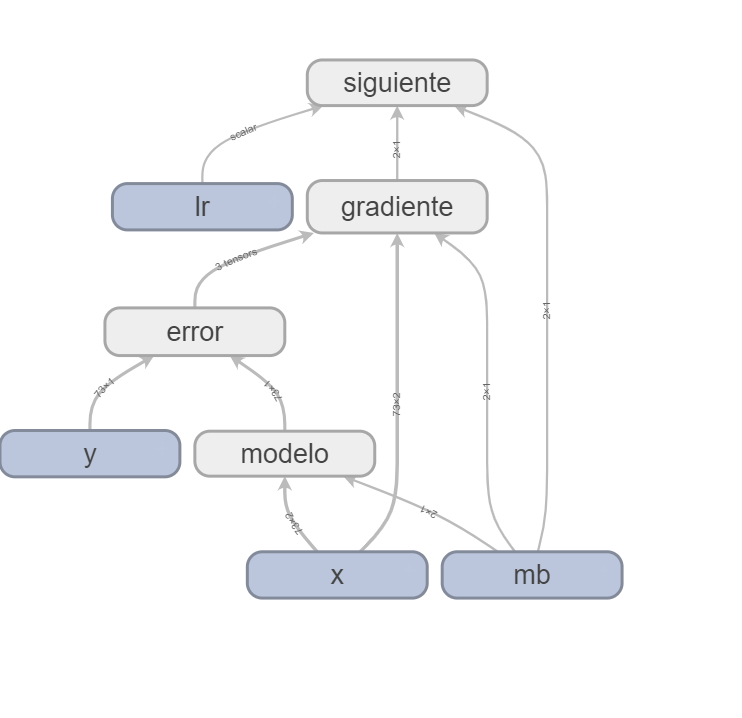

In [12]:
from IPython.display import Image

#Grafo del tensor
Image(filename='grafo.png') 

In [13]:
#Varaibles que se utilizarán en todos los expermientos
tamaño_muestra = training #training es la totalidad de filas del set de entrenamiento
y1 = my_reshape(data_training[:,0])
x1 = my_reshape(data_training[:,columna_1st_predictivo])

In [23]:
#Experimento 1
##Estocastico

#Numero de iteraciones
epochs = 16
#Learning rate
lr = 0.001
#Tamaño de mini batch
batch_size = 1
#Hipotesis
mb = [[0], [0]]
#String de configuración
string = "exp1_estocastico_"
#Iteraciones
iteraciones=1

modelo_variable1 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado1 = modelo_variable1.predecir()

In [24]:
#Experimento 2
##mini batch

#Numero de iteraciones
epochs = 16
#Learning rate
lr = 0.001
#Tamaño de mini batch
batch_size = 73
#Hipotesis
mb = [[0], [0]]
#String de configuración
string = "exp2_minibatch_"
#Iteraciones
iteraciones=1

modelo_variable2 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado2 = modelo_variable2.predecir()

In [25]:
#Experimento 3
##batch

#Numero de iteraciones
epochs = 1
#Learning rate
lr = 0.001
#Tamaño de mini batch
batch_size = tamaño_muestra
#Hipotesis
mb = [[0], [0]]
#String de configuración
string = "exp3_batch_"
#Iteraciones
iteraciones=100

modelo_variable3 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado3 = modelo_variable3.predecir()

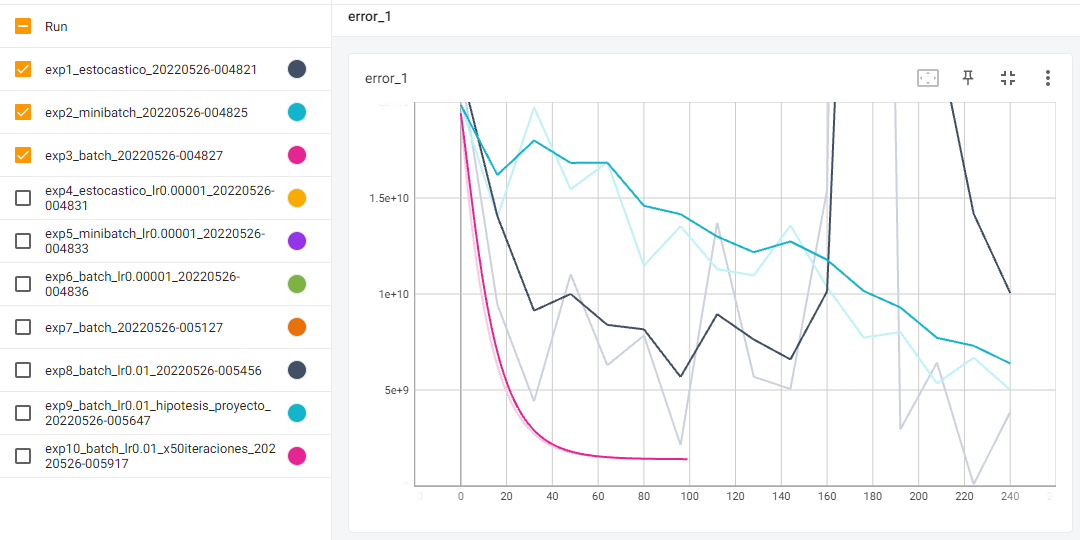

In [33]:
Image(filename='error1-2-3.png') 

#En el error en tiempo real mostrado por Tensorflow se observa que el experimento 3 batch tuvo una mejor optimización

In [26]:
#Experimento 4
##Estocastico menor lr

#Numero de iteraciones
epochs = 16
#Learning rate
lr = 0.00001
#Tamaño de mini batch
batch_size = 1
#Hipotesis
mb = [[0], [0]]
#String de configuración
string = "exp4_estocastico_lr0.00001_"
#Iteraciones
iteraciones=1

modelo_variable4 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado4 = modelo_variable4.predecir()

In [27]:
#Experimento 5
##mini batch menor lr

#Numero de iteraciones
epochs = 16
#Learning rate
lr = 0.00001
#Tamaño de mini batch
batch_size = 73
#Hipotesis
mb = [[0], [0]]
#String de configuración
string = "exp5_minibatch_lr0.00001_"
#Iteraciones
iteraciones=1

modelo_variable5 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado5 = modelo_variable5.predecir()

In [28]:
#Experimento 6
##batch menor lr

#Numero de iteraciones
epochs = 1
#Learning rate
lr = 0.00001
#Tamaño de mini batch
batch_size = tamaño_muestra
#Hipotesis
mb = [[0], [0]]
#String de configuración
string = "exp6_batch_lr0.00001_"
#Iteraciones
iteraciones=100

modelo_variable6 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado6 = modelo_variable6.predecir()

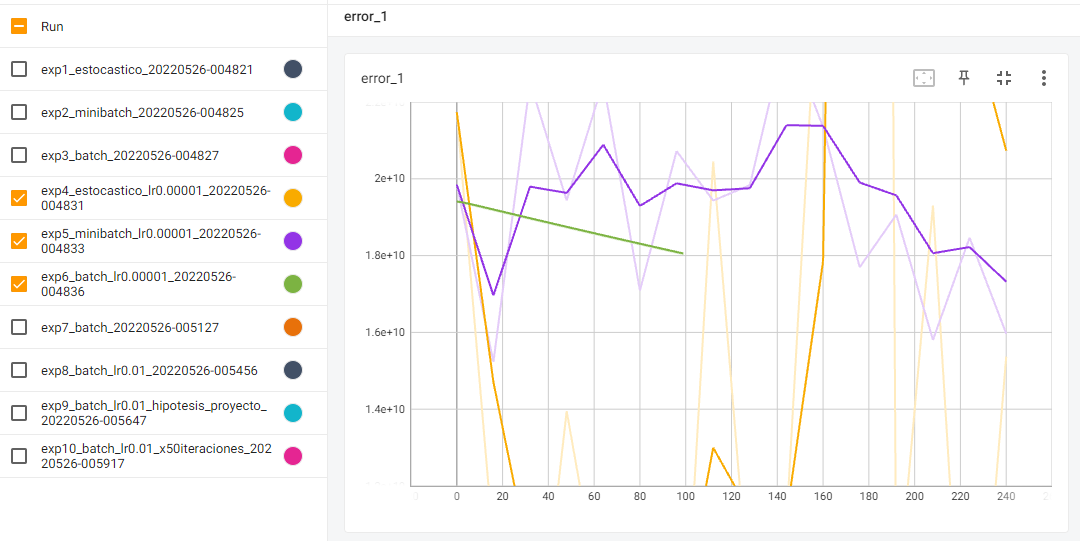

In [34]:
Image(filename='error4-5-6.png') 

#Al repetir los experimentos con un menor parametro de learning rate, se visualiza 
#que el experimento 5 mini batch menor lr mostró mejores resultados

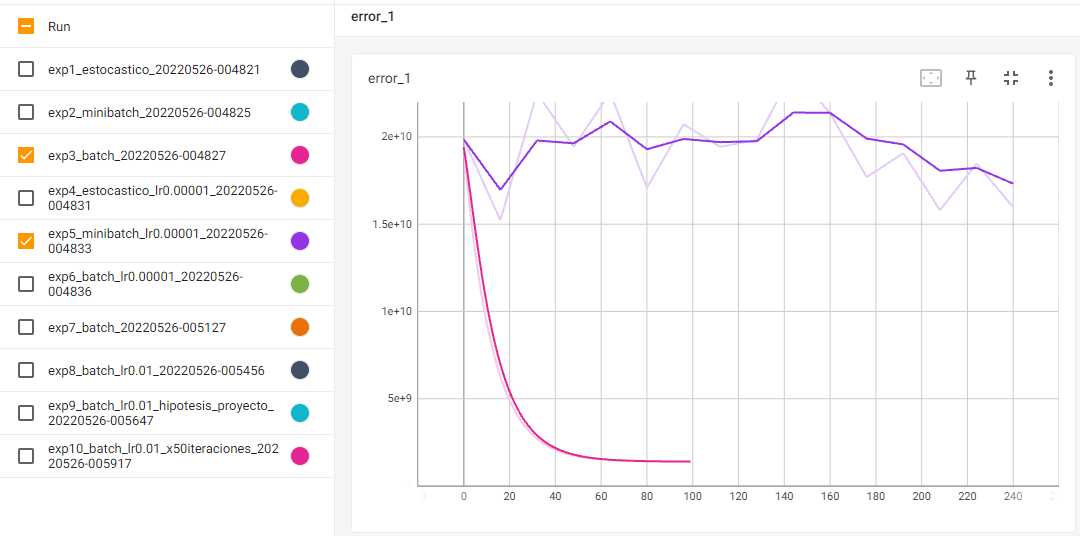

In [35]:
Image(filename='error3-5.png')

#Si se comparán los resultados de los experimentos 3 y 5, se visualiza que el batch es mejor

In [29]:
#Experimento 7
##batch mayor lr

#Numero de iteraciones
epochs = 1
#Learning rate
lr = 0.1
#Tamaño de mini batch
batch_size = tamaño_muestra
#Hipotesis
mb = [[0], [0]]
#String de configuración
string = "exp7_batch_lr0.1_"
#Iteraciones
iteraciones=100

modelo_variable7 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado7 = modelo_variable7.predecir()

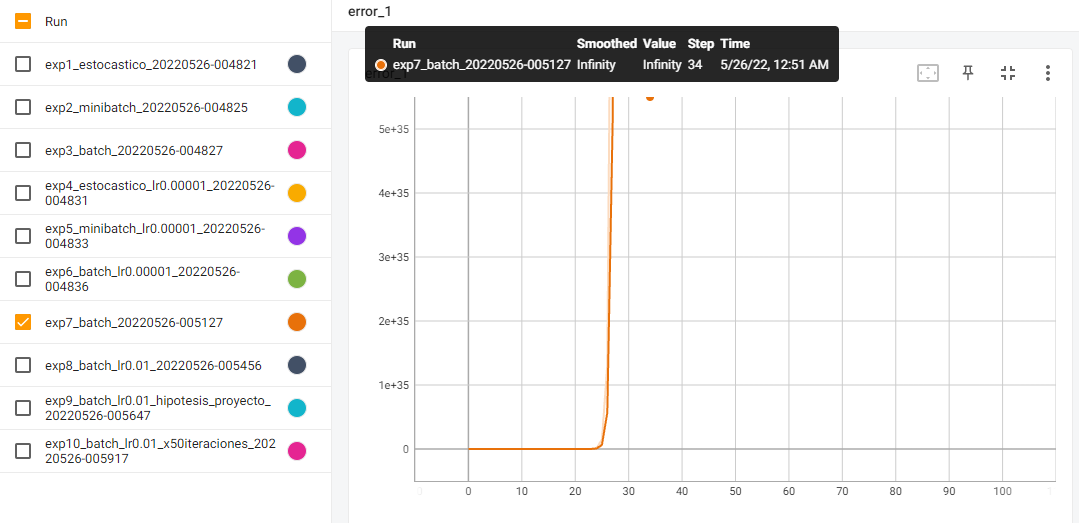

In [36]:
Image(filename='error7.png')

#El experimento 7 se descartará porque el error tiende al infinito

In [30]:
#Experimento 8
##batch mayor lr version dos

#Numero de iteraciones
epochs = 1
#Learning rate
lr = 0.01
#Tamaño de mini batch
batch_size = tamaño_muestra
#Hipotesis
mb = [[0], [0]]
#String de configuración
string = "exp8_batch_lr0.01_"
#Iteraciones
iteraciones=100

modelo_variable8 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado8 = modelo_variable8.predecir()

In [31]:
#Experimento 9
##batch mayor lr version dos con hipotesis del proyecto

#Numero de iteraciones
epochs = 1
#Learning rate
lr = 0.01
#Tamaño de mini batch
batch_size = tamaño_muestra
#Hipotesis
mb = [[200.00], [50000.00]]
#String de configuración
string = "exp9_batch_lr0.01_hipotesis_proyecto_"
#Iteraciones
iteraciones=100

modelo_variable9 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado9 = modelo_variable9.predecir()

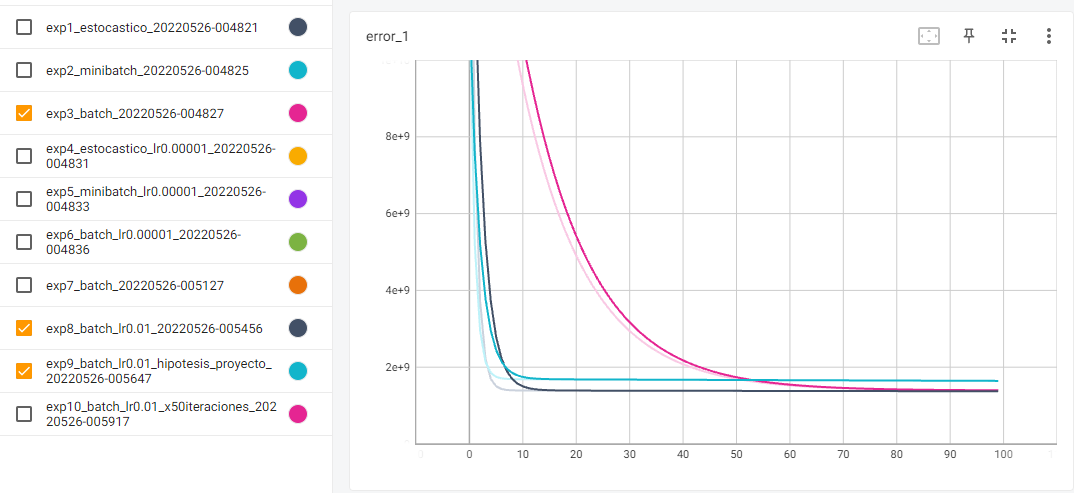

In [37]:
Image(filename='error3-8-9.png')

#Entre los experimentos 3, 8 y 9 el mejor es el 8 batch mayor lr=0.01

In [51]:
#Experimento 10
##batch mayor lr version dos con x50 iteraciones más

#Numero de iteraciones
epochs = 1
#Learning rate
lr = 0.01
#Tamaño de mini batch
batch_size = tamaño_muestra
#Hipotesis
mb = [[0], [0]]
#String de configuración
string = "exp10_batch_lr0.01_x50iteraciones_"
#Iteraciones
iteraciones=5000

modelo_variable10 = ModeloLineal(x1, y1, tamaño_muestra, lr, epochs, batch_size, mb, string, iteraciones)
resultado10 = modelo_variable10.predecir()

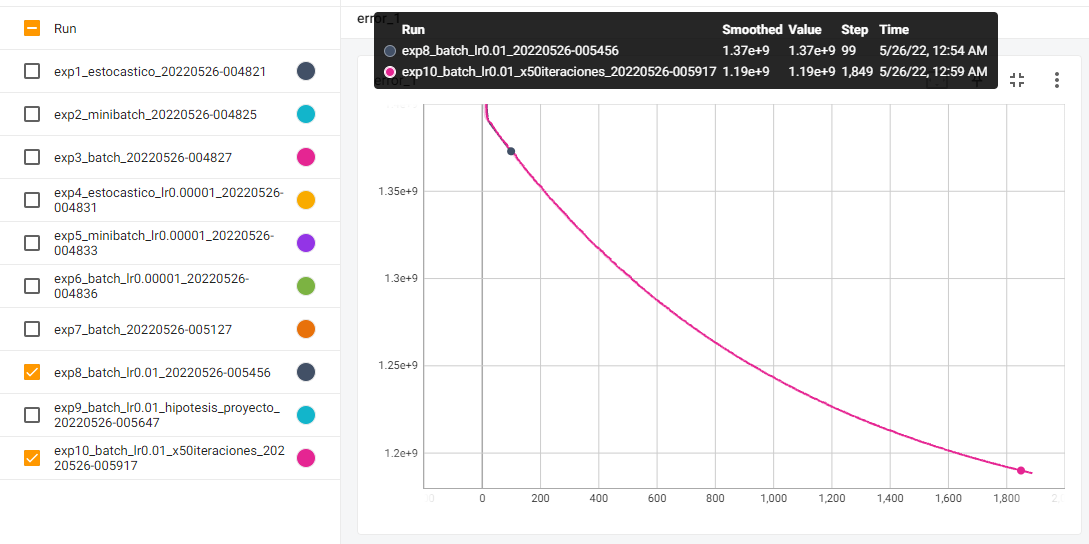

In [38]:
Image(filename='error8-10.png')

#Entre los experimentos 8 y 10, el 10 muestra mejores resultados, entre más iteraciones el error reduce más

In [54]:
#Conclusión

#El metodo de gradiente decreciente batch es mejor que el mini-batch y el estocastico
#El metodo batch optimiza más conforme se aumentan las iteraciones, esto consume más recurso pero el resultado es mejor.
#Al hacer pruebas con varias hipotesis, se asegura que el error encontrado es el mínimo